In [1]:
import os
# numerical computing package
import numpy as np
# basemap toolkit to plot maps
from mpl_toolkits.basemap import Basemap
# command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt
# matplotlib
import matplotlib
# find nearest value
def find_nearest_index(array, value):
    return (np.abs(array - value)).argmin()
#
import sys
#
import pickle
#
import xarray as xr
#
from glob import glob as gb
#
import time
#
import cartopy.crs as ccrs

In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
!pwd

/home/561/erd561/wombat_jra-iaf_mom025


In [4]:
figures_path = '/home/561/erd561/figures/wombat_jra_mom025/'
script_name = nb_name[:-6]
print('Figures will be saved in: ' + figures_path + script_name + '\n')

remote_path1 = '/g/data/ua8/JRA55-do/v1-3/'

remote_path2 = '/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/'

Figures will be saved in: /home/561/erd561/figures/wombat_jra_mom025/c01_year_to_year_variability



In [5]:
%%time

from dask.distributed import Client
c = Client()
print(c)

<Client: scheduler='tcp://127.0.0.1:34750' processes=8 cores=8>
CPU times: user 718 ms, sys: 205 ms, total: 923 ms
Wall time: 5.04 s


In [6]:
# q_10, rain, rlds, rsds, snow, t_10, u_10, v_10
years = np.arange(1958, 2017)

var1 = 't_10'
files1 = sorted(gb(remote_path1 + var1 + '.*.18Oct2017.nc'))

# remove 2017 as is missing
del files1[-1]

for f in files1:
    print(f)
    
print(len(files1))


var2 = 'u_10'
files2 = sorted(gb(remote_path1 + var2 + '.*.18Oct2017.nc'))
# remove 2017 as is missing
del files2[-1]
for f in files2:
    print(f)
print(len(files2))

/g/data/ua8/JRA55-do/v1-3/t_10.1958.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1959.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1960.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1961.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1962.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1963.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1964.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1965.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1966.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1967.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1968.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1969.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1970.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1971.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1972.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1973.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1974.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1975.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1976.18Oct2017.nc
/g/data/ua8/JRA55-do/v1-3/t_10.1977.18Oct2017.nc
/g/data/ua8/JRA55-do

In [7]:
%%time

tas_10m = []
uas_10m = []
for f1, f2 in zip(files1, files2):
    
    if f1 == files1[0]:
        lon = \
            xr.open_dataset(f1).\
            longitude.\
            sel(longitude=slice(100,170))
        lat = \
            xr.open_dataset(f1).\
            latitude.\
            sel(latitude=slice(-70,-10))
        
        tas_10m = \
            xr.open_dataset(f1).\
            tas_10m.\
            sel(latitude=slice(-70,-10), longitude=slice(100,170)).\
            mean(dim='time')-273.15
        print(str(f1) + ' OK')
        
        uas_10m = \
            xr.open_dataset(f2).\
            uas_10m.\
            sel(latitude=slice(-70,-10), longitude=slice(100,170)).\
            mean(dim='time')
        print(str(f2) + ' OK')
            
    else:
        tas_10m = \
            xr.concat([
                xr.open_dataset(f1).\
                tas_10m.\
                sel(latitude=slice(-70,-10), longitude=slice(100,170)).\
                mean(dim='time')-273.15,
                tas_10m
            ], 'year'
            )
        print(str(f1) + ' OK')
        
        uas_10m = \
            xr.concat([ 
                xr.open_dataset(f2).\
                uas_10m.\
                sel(latitude=slice(-70,-10), longitude=slice(100,170)).\
                mean(dim='time'),
                uas_10m
            ], 'year'
            )
        print(str(f2) + ' OK')
    

print(tas_10m.shape)
print(uas_10m.shape)

/g/data/ua8/JRA55-do/v1-3/t_10.1958.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1958.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/t_10.1959.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1959.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/t_10.1960.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1960.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/t_10.1961.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1961.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/t_10.1962.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1962.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/t_10.1963.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1963.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/t_10.1964.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1964.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/t_10.1965.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1965.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/t_10.1966.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/u_10.1966.18Oct2017.nc OK
/g/data/ua8/JRA55-do/v1-3/t_10.1967.18Oct2017.nc OK
/g/data/ua8/

1958 OK
1959 OK
1960 OK
1961 OK
1962 OK
1963 OK
1964 OK
1965 OK
1966 OK
1967 OK
1968 OK
1969 OK
1970 OK
1971 OK
1972 OK
1973 OK
1974 OK
1975 OK
1976 OK
1977 OK
1978 OK
1979 OK
1980 OK
1981 OK
1982 OK
1983 OK
1984 OK
1985 OK
1986 OK
1987 OK
1988 OK
1989 OK
1990 OK
1991 OK
1992 OK
1993 OK
1994 OK
1995 OK
1996 OK
1997 OK
1998 OK
1999 OK
2000 OK
2001 OK
2002 OK
2003 OK
2004 OK
2005 OK
2006 OK
2007 OK
2008 OK
2009 OK
2010 OK
2011 OK
2012 OK
2013 OK
2014 OK
2015 OK
2016 OK
CPU times: user 6min 36s, sys: 2min 53s, total: 9min 29s
Wall time: 6min 2s


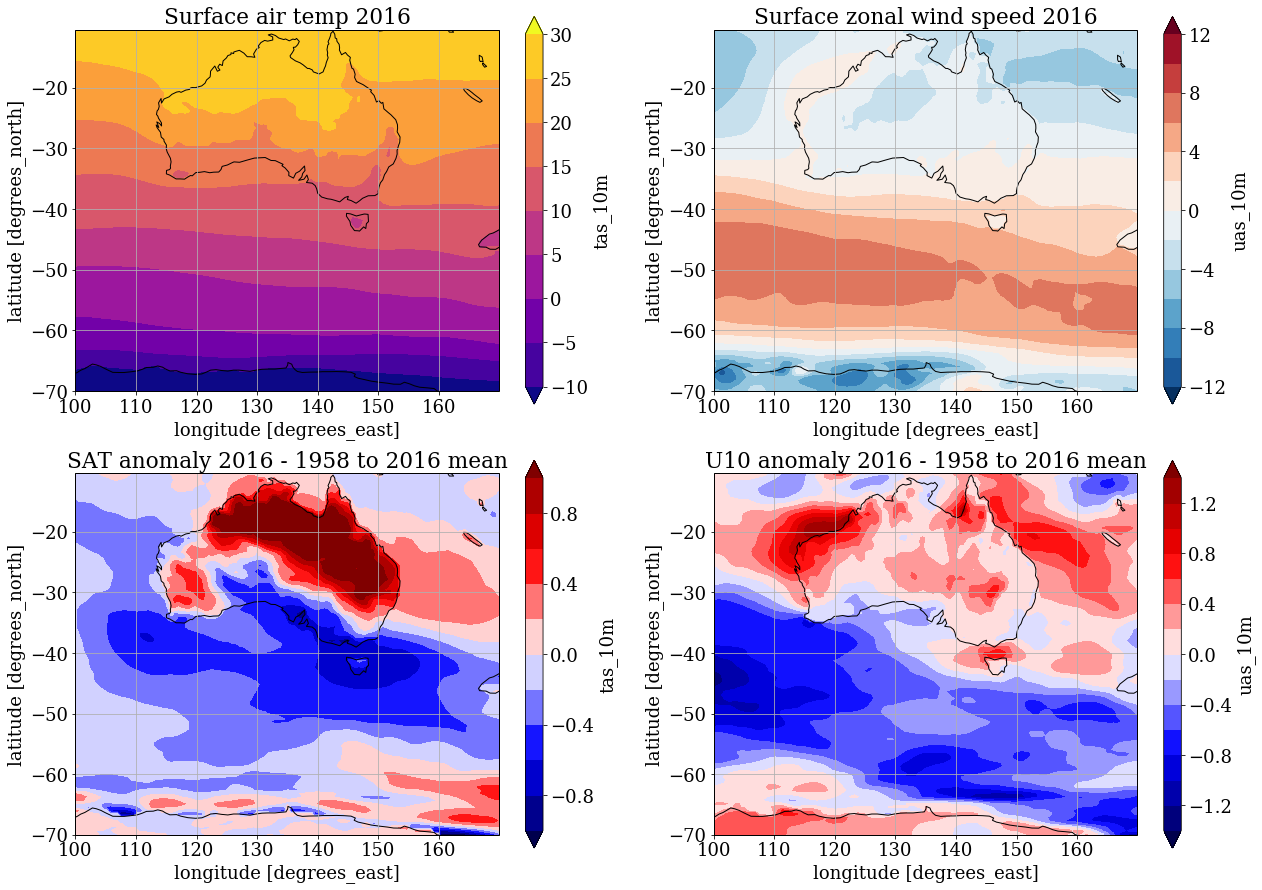

In [12]:
%%time

matplotlib.rcParams.update({'font.size': 18}) 
row = 2
col = 2
plt.rc('text', usetex=False)
plt.rc('font', family='serif')


for fid, (f1, f2) in enumerate(zip(files1, files2)):
    plt.close('all')
    fig = plt.figure() 
    fig.set_size_inches(18,14)


    ##
    ax = plt.subplot(row,col,1, projection=ccrs.PlateCarree())
    ax.coastlines()
    cmap = 'plasma'
    step = 5
    contf_lvls = np.arange(-10,30+1e-08,step) 
    tas_10m[:,:,fid].plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
    plt.title('Surface air temp ' + str(years[fid]))
    ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
    ax.grid()
    
    ax = plt.subplot(row,col,2, projection=ccrs.PlateCarree())
    ax.coastlines()
    cmap = 'RdBu_r'
    step = 2
    contf_lvls = np.arange(-12,12+1e-08,step)
    uas_10m[:,:,fid].plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
    plt.title('Surface zonal wind speed ' + str(years[fid]))
    ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
    ax.grid()

    ##
    ax = plt.subplot(row,col,3, projection=ccrs.PlateCarree())
    ax.coastlines()
    cmap = 'seismic'
    step = 0.2
    contf_lvls = np.arange(-1,1+1e-08,step) 
    tas_10m_anom = tas_10m[:,:,fid] - tas_10m.mean(dim='year')
    tas_10m_anom.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
    plt.title('SAT anomaly ' + str(years[fid]) + ' - 1958 to 2016 mean')
    ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
    ax.grid()

    ax = plt.subplot(row,col,4, projection=ccrs.PlateCarree())
    ax.coastlines()
    cmap = 'seismic'
    step = 0.2
    contf_lvls = np.arange(-1.4,1.4+1e-08,step)
    uas_10m_anom = uas_10m[:,:,fid] - uas_10m.mean(dim='year')
    uas_10m_anom.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
    plt.title('U10 anomaly ' + str(years[fid]) + ' - 1958 to 2016 mean')
    ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
    ax.grid()

    fig.tight_layout(rect=[0, 0, 1, 0.90])

    output_ls = os.listdir(figures_path)
    if not script_name:
        script_name = 'test'
    elif script_name not in output_ls:
        os.mkdir(figures_path + '/' + script_name)
    plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
                + '_fig1_' + str(years[fid]) + '.png', bbox_inches='tight', dpi=200)
    
    print(str(years[fid]) + ' OK')
